<a href="https://colab.research.google.com/github/ooofreezy/RDAMP-Sales-Analysis/blob/main/Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
#let's load the dataset into a pandas dataframe
retail_dataset = pd.read_excel('/content/Ace Superstore Retail Dataset.xlsx')

In [38]:
#checking the first 5 rows
retail_dataset.head()

,Order ID,Order Date,Order Mode,Customer ID,City,Postal Code,Country,Region,Product ID,Product Name,Category,Sub-Category,Sales,Cost Price,Quantity,Discount
0,BTC-245712,2024-06-22,Online,LO028977,Norton,S8,England,NaN,01JZ3N512GHNAJSF3HCCQ0PQYY,Flavored Popcorn Mix,Food - Snacks,Gourmet Snacks,2.99,0.897,4,0.24
1,NZR-891212,2024-03-15,In-Store,OH046670,West End,DN36,England,East of England,01JZ3N56DDVK7Y600QGH2M6T1X,Olive Oil,Food - Condiments,Cooking Oils,7.99,2.397,16,0.32
2,TDN-811093,2024-02-29,Online,FH015492,Newtown,RG20,England,East Midlands,01JZ3N53A64TW72TVK28SMMXKX,Children's Backpack,Accessories,Kids' Bags,29.99,8.997,2,0.09
3,MIX-746378,2024-10-25,In-Store,ZZ015342,East End,BH21,England,North West,01JZ3N572S4RVA29Y33YRWH174,Honey Butter Popcorn,Food - Snacks,Gourmet Snacks,2.99,0.897,4,0.01
4,UGI-201465,2024-08-18,Online,TV075977,Seaton,LE15,England,East Midlands,01JZ3N52RT7CJNB27BFS6H8BF7,Sliced Cucumbers,Food - Produce,Fresh Cut Vegetables,1.29,0.387,11,0.34


In [39]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      11000 non-null  object        
 1   Order Date    11000 non-null  datetime64[ns]
 2   Order Mode    11000 non-null  object        
 3   Customer ID   11000 non-null  object        
 4   City          11000 non-null  object        
 5   Postal Code   11000 non-null  object        
 6   Country       10780 non-null  object        
 7   Region        8189 non-null   object        
 8   Product ID    11000 non-null  object        
 9   Product Name  11000 non-null  object        
 10  Category      10802 non-null  object        
 11  Sub-Category  11000 non-null  object        
 12  Sales         11000 non-null  float64       
 13  Cost Price    11000 non-null  float64       
 14  Quantity      11000 non-null  int64         
 15  Discount      10027 non-null  float6

In [40]:
retail_dataset.describe()

,Order Date,Sales,Cost Price,Quantity,Discount
count,11000,11000.000000,11000.000000,11000.000000,10027.000000
mean,2024-02-28 06:43:04.145454336,27.393995,9.032361,10.491273,0.172086
min,2023-01-01 00:00:00,-0.100000,-0.263000,1.000000,0.000000
25%,2023-08-14 00:00:00,3.990000,1.197000,5.000000,0.070000
50%,2024-03-14 00:00:00,12.140000,3.897000,11.000000,0.160000
75%,2024-09-12 06:00:00,33.990000,11.447000,15.000000,0.270000
max,2025-03-30 00:00:00,900.990000,359.996000,20.000000,0.400000
std,NaN,47.209430,16.198765,5.758632,0.113953


In [41]:
#let's check for missing values
retail_dataset.isnull().sum()

,0
Order ID,0
Order Date,0
Order Mode,0
Customer ID,0
City,0
Postal Code,0
Country,220
Region,2811
Product ID,0
Product Name,0


In [42]:
#handle missing values in discount with mean
retail_dataset['Discount']. fillna(retail_dataset['Discount'].mean(), inplace = True)

In [43]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      11000 non-null  object        
 1   Order Date    11000 non-null  datetime64[ns]
 2   Order Mode    11000 non-null  object        
 3   Customer ID   11000 non-null  object        
 4   City          11000 non-null  object        
 5   Postal Code   11000 non-null  object        
 6   Country       10780 non-null  object        
 7   Region        8189 non-null   object        
 8   Product ID    11000 non-null  object        
 9   Product Name  11000 non-null  object        
 10  Category      10802 non-null  object        
 11  Sub-Category  11000 non-null  object        
 12  Sales         11000 non-null  float64       
 13  Cost Price    11000 non-null  float64       
 14  Quantity      11000 non-null  int64         
 15  Discount      11000 non-null  float6

In [44]:
retail_dataset['Region']. fillna(retail_dataset['Region'].mode(), inplace = True)

In [45]:
# Handle missing values in 'Country' with the mode
retail_dataset['Country'].fillna(retail_dataset['Country'].mode()[0], inplace=True)

In [46]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      11000 non-null  object        
 1   Order Date    11000 non-null  datetime64[ns]
 2   Order Mode    11000 non-null  object        
 3   Customer ID   11000 non-null  object        
 4   City          11000 non-null  object        
 5   Postal Code   11000 non-null  object        
 6   Country       11000 non-null  object        
 7   Region        8190 non-null   object        
 8   Product ID    11000 non-null  object        
 9   Product Name  11000 non-null  object        
 10  Category      10802 non-null  object        
 11  Sub-Category  11000 non-null  object        
 12  Sales         11000 non-null  float64       
 13  Cost Price    11000 non-null  float64       
 14  Quantity      11000 non-null  int64         
 15  Discount      11000 non-null  float6

In [47]:
#Let's calculate the Total sales revenue and average discount rate by region and segment
region_segment_summary = retail_dataset.groupby(['Region', 'Category']).agg(
    Total_Revenue=pd.NamedAgg(column='Sales', aggfunc='sum'),
    Average_Discount=pd.NamedAgg(column='Discount', aggfunc='mean')
).reset_index()

In [48]:
print(region_segment_summary)

                       Region       Category  Total_Revenue  Average_Discount
0               East Midlands    Accessories         705.65          0.190644
1               East Midlands           Apps          25.99          0.120000
2               East Midlands   Art Supplies         181.36          0.245695
3               East Midlands          Audio         514.89          0.160000
4               East Midlands     Automotive         194.47          0.137143
..                        ...            ...            ...               ...
935  Yorkshire and the Humber        Storage          31.13          0.260000
936  Yorkshire and the Humber          Tools         143.26          0.147500
937  Yorkshire and the Humber           Toys         238.36          0.154444
938  Yorkshire and the Humber         Travel          46.98          0.105000
939  Yorkshire and the Humber  Wearable Tech         379.97          0.233333

[940 rows x 4 columns]


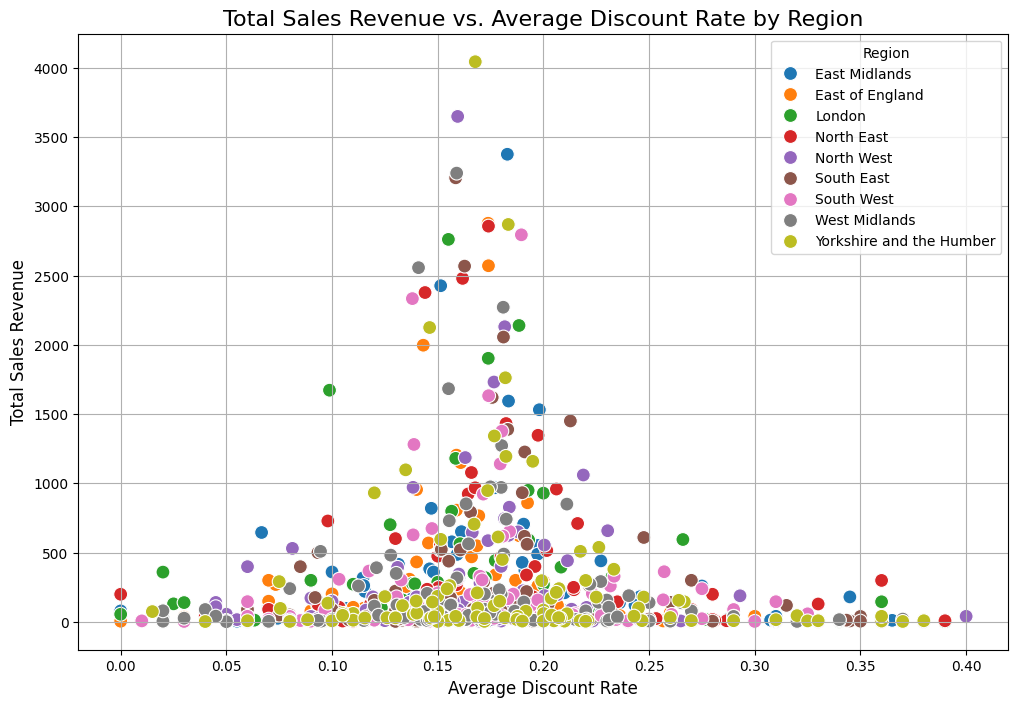

In [49]:
# Let's generate a scatter plot of Total_Revenue vs. Average_Discount, colored by Region
plt.figure(figsize=(12, 8))
sns.scatterplot(data=region_segment_summary, x='Average_Discount', y='Total_Revenue', hue='Region', s=100)

# titles and labels
plt.title('Total Sales Revenue vs. Average Discount Rate by Region', fontsize=16)
plt.xlabel('Average Discount Rate', fontsize=12)
plt.ylabel('Total Sales Revenue', fontsize=12)

# Add a legend
plt.legend(title='Region')

# Show the plot
plt.grid(True)
plt.show()

In [50]:
# Let's calculate product revenue
product_revenue = retail_dataset.groupby('Product Name').agg(
    Total_Revenue=pd.NamedAgg(column='Sales', aggfunc='sum')
).reset_index()

In [51]:
# Let's identify top and bottom products
top_5_products = product_revenue.sort_values(by='Total_Revenue', ascending=False).head(5)
bottom_5_products = product_revenue.sort_values(by='Total_Revenue', ascending=True).head(5)

In [52]:
print(top_5_products)

                       Product Name  Total_Revenue
1200  Portable Refrigerator Freezer        4504.38
484                   Electric Bike        4499.25
1204       Portable Solar Generator        3998.20
443                  Digital Camera        3902.86
363          Compact Digital Camera        2998.17


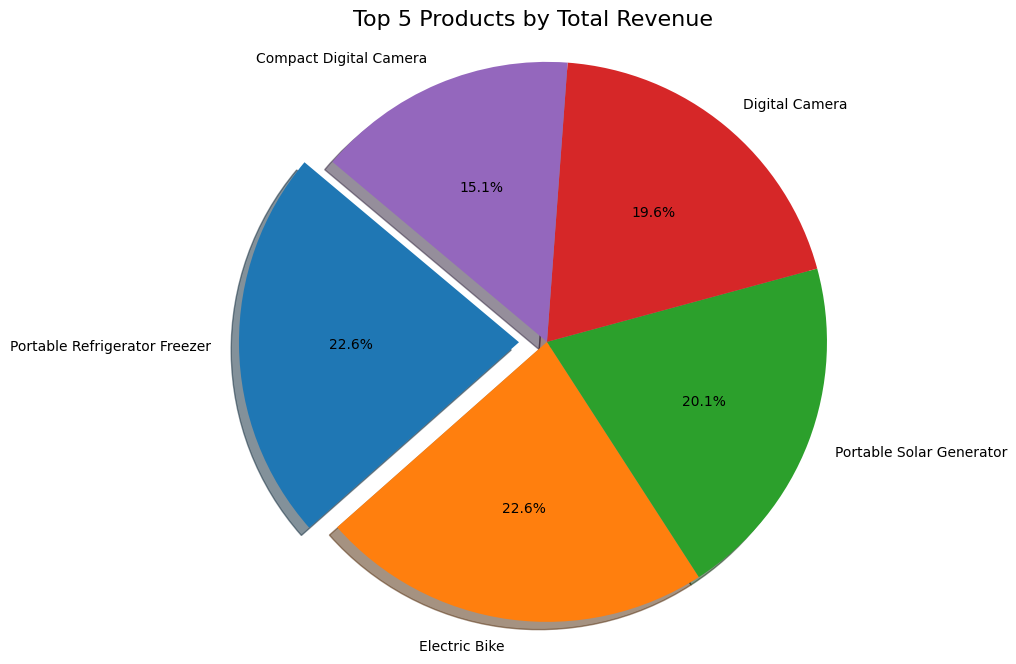

In [53]:
#Let's present the top 5 products in a pie chart

labels = top_5_products['Product Name']
sizes = top_5_products['Total_Revenue']
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice (highest revenue)

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

# title
plt.title('Top 5 Products by Total Revenue', fontsize=16)

# Ensuring equal aspect ratio so that the pie is drawn as a circle.
plt.axis('equal')

plt.show()

In [54]:
print(bottom_5_products)

             Product Name  Total_Revenue
188    Canned Black Beans           1.29
563   Flavored Rice Cakes           1.49
1554         Tomato Paste           1.87
1335         Sesame Seeds           1.99
87            Baking Soda           2.13


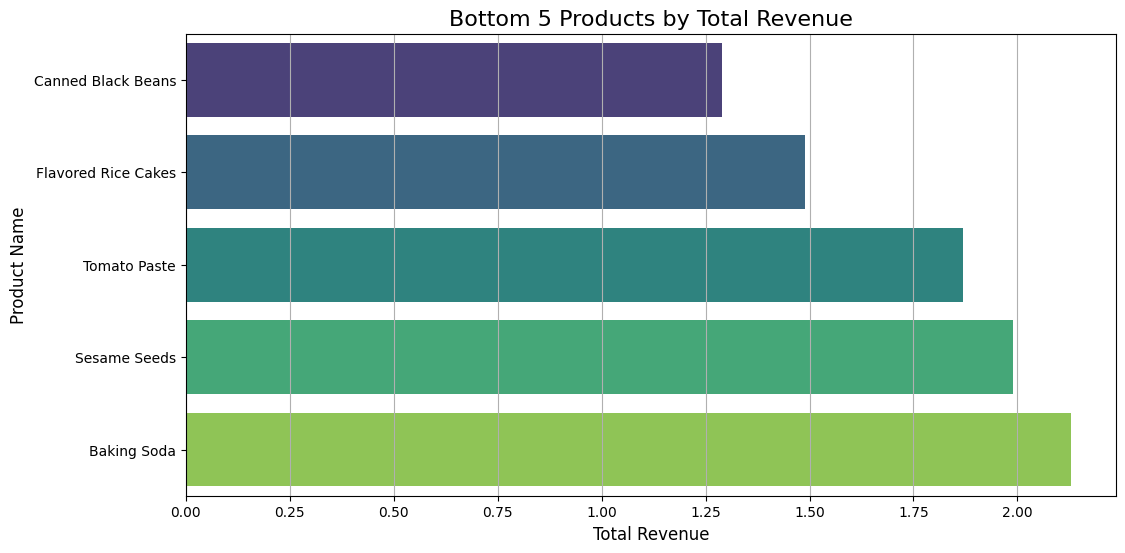

In [55]:

# Let's present the bottom 5 products in a bar graph

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_5_products, x='Total_Revenue', y='Product Name', palette='viridis')

# titles and labels
plt.title('Bottom 5 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# let's show the plot
plt.grid(axis='x')
plt.show()


Product Categories with Highest Margins:
                  Category     Profit
122                Outdoor  23532.382
119                Kitchen  23239.987
115                   Home  14342.611
30             Electronics  14136.782
31                 Fitness   9371.684
..                     ...        ...
71     Food - Gourmet Rice     13.699
105         Food - Spreads     11.065
95          Food - Protein     10.476
96   Food - Salad Toppings      7.472
58         Food - Dressing      5.769

[133 rows x 2 columns]


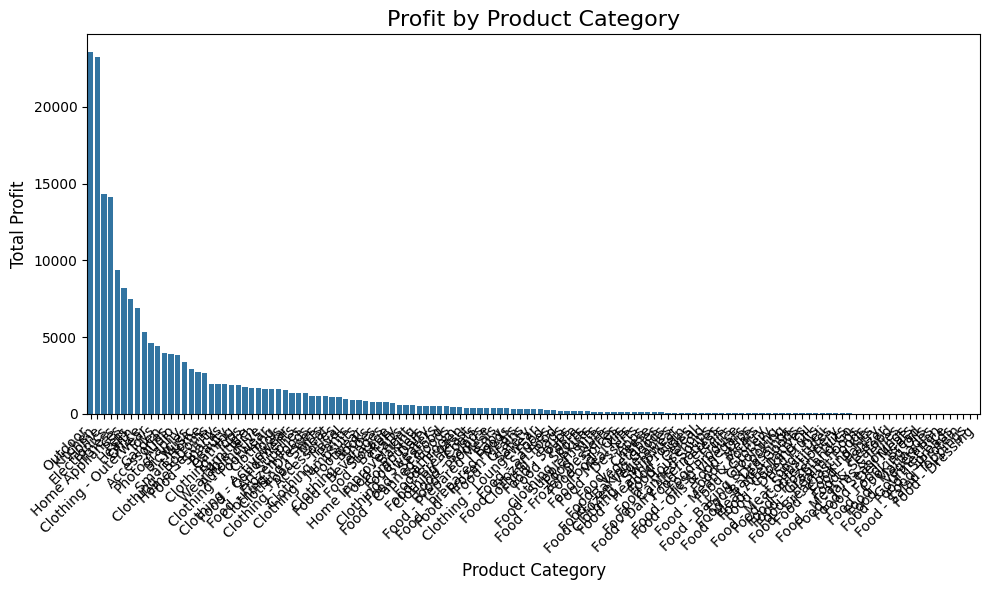

In [56]:
# Let's provide insights into product categories with highest margins

# Let's calculate Profit for each row
retail_dataset['Profit'] = retail_dataset['Sales'] - retail_dataset['Cost Price']

# Le'ts group by Category and calculate the sum of Profit
category_profit = retail_dataset.groupby('Category')['Profit'].sum().reset_index()

# Let's Sort categories by profit in descending order to find highest margins
category_profit_sorted = category_profit.sort_values(by='Profit', ascending=False)

print("Product Categories with Highest Margins:")
print(category_profit_sorted)

# Let's visualize the profit by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_profit_sorted, x='Category', y='Profit')
plt.title('Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sales Distribution by Order Mode:
  Order Mode      Sales
0   In-Store  145746.63
1     Online  155587.32


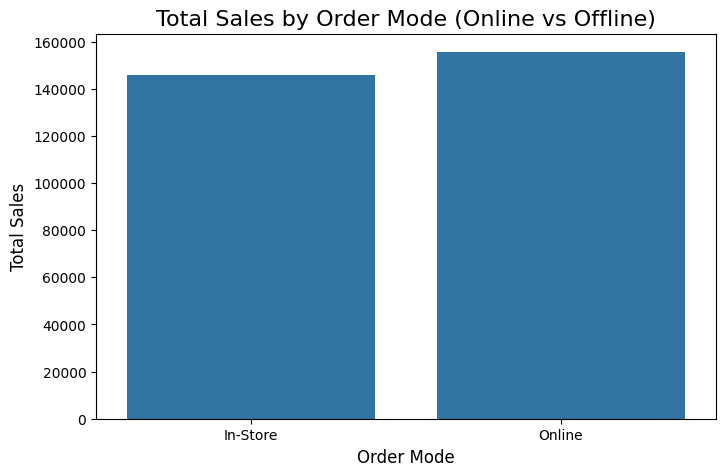

In [57]:
# Let's analyse sales distribution across order mode (online vs offline)

if 'Order Mode' in retail_dataset.columns:
  sales_distribution = retail_dataset.groupby('Order Mode')['Sales'].sum().reset_index()

  print("\nSales Distribution by Order Mode:")
  print(sales_distribution)

  # Let's visualize the sales distribution
  plt.figure(figsize=(8, 5))
  sns.barplot(data=sales_distribution, x='Order Mode', y='Sales')
  plt.title('Total Sales by Order Mode (Online vs Offline)', fontsize=16)
  plt.xlabel('Order Mode', fontsize=12)
  plt.ylabel('Total Sales', fontsize=12)
  plt.show()
else:
  print("\n'Order Mode' column not found in the dataset. Cannot perform analysis on order mode distribution.")
  print("Available columns:", retail_dataset.columns.tolist())